In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths to the extracted train and test directories
train_extract_path = '/content/drive/MyDrive/Task 03/train'
test_extract_path = '/content/drive/MyDrive/Task 03/test'

# Load image data and labels
def load_data(data_path):
    images = []
    labels = []
    for filename in os.listdir(data_path):
        if filename.endswith('.jpg'):
            label = 0 if 'cat' in filename else 1
            img = load_img(os.path.join(data_path, filename), target_size=(64, 64))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = load_data(train_extract_path)
test_images, test_labels = load_data(test_extract_path)

# Print the number of loaded images and the distribution of labels
print(f'Train images loaded: {len(train_images)}')
print(f'Test images loaded: {len(test_images)}')
print(f'Train label distribution: {np.bincount(train_labels)}')
print(f'Test label distribution: {np.bincount(test_labels)}')

Train images loaded: 1008
Test images loaded: 1044
Train label distribution: [506 502]
Test label distribution: [   0 1044]


In [13]:
# Check if images are loaded correctly before preprocessing
if len(train_images) == 0 or len(test_images) == 0:
    raise ValueError("No images were loaded. Please check the dataset path and ensure the images are in the correct format.")

# Normalize pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten images for SVM input
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Print the shapes of the flattened images
print(f'Train images shape: {train_images_flat.shape}')
print(f'Test images shape: {test_images_flat.shape}')

Train images shape: (1008, 12288)
Test images shape: (1044, 12288)


In [14]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95, random_state=42)
train_images_pca = pca.fit_transform(train_images_flat)
test_images_pca = pca.transform(test_images_flat)

# Ensure there are two classes in the training data
if len(np.unique(train_labels)) < 2:
    raise ValueError("The number of classes has to be greater than one. Ensure both cats and dogs are present in the training data.")

# Train the SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(train_images_pca, train_labels)

# Make predictions on the test set
test_predictions = svm.predict(test_images_pca)

In [15]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
report = classification_report(test_labels, test_predictions, target_names=['Cat', 'Dog'])
print(report)

Accuracy: 51.63%
              precision    recall  f1-score   support

         Cat       0.00      0.00      0.00         0
         Dog       1.00      0.52      0.68      1044

    accuracy                           0.52      1044
   macro avg       0.50      0.26      0.34      1044
weighted avg       1.00      0.52      0.68      1044



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


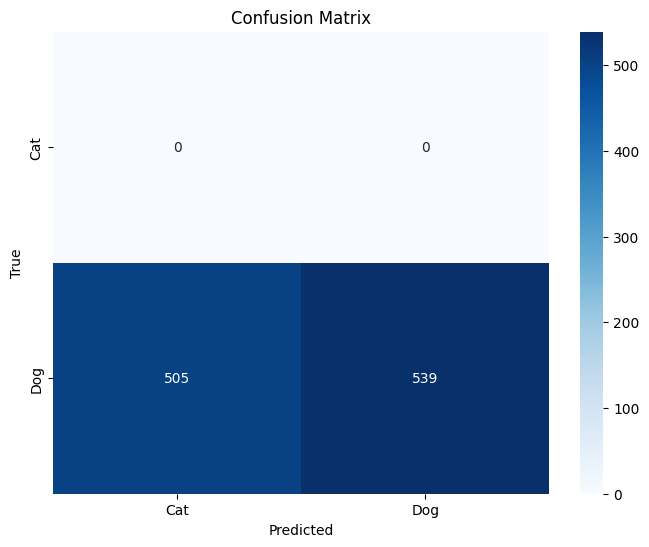

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()